<a href="https://colab.research.google.com/github/zhichunqi/Deep-Learning-HW/blob/master/Homework3_Zhichun_Qi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping


from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/'

df= pd.read_csv(abspath_curr + 'TSLA.csv',
                           header=0)

print("Number of rows and columns:", df.shape)
df.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Number of rows and columns: (1328, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-09,51.816002,52.590000,51.358002,51.584000,51.584000,16670500
1,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
2,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
3,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
4,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000


In [ ]:
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

Lag 1

In [ ]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output 
X_train1 = []
y_train1 = []
for i in range(60, 800,1):
    X_train1.append(training_set_scaled[i-60:i, 0])
    y_train1.append(training_set_scaled[i, 0])
X_train1, y_train1 = np.array(X_train1), np.array(y_train1)
X_train1 = np.reshape(X_train1, (X_train1.shape[0], X_train1.shape[1], 1))
print(X_train1.shape)

(740, 60, 1)


In [ ]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train1.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 3s 106ms/step - loss: 0.0521
Epoch 2/100
24/24 [==============================] - 3s 116ms/step - loss: 0.0131
Epoch 3/100
24/24 [==============================] - 3s 116ms/step - loss: 0.0120
Epoch 4/100
24/24 [==============================] - 3s 116ms/step - loss: 0.0129
Epoch 5/100
24/24 [==============================] - 3s 116ms/step - loss: 0.0114
Epoch 6/100
24/24 [==============================] - 3s 115ms/step - loss: 0.0112
Epoch 7/100
24/24 [==============================] - 3s 116ms/step - loss: 0.0110
Epoch 8/100
24/24 [==============================] - 3s 117ms/step - loss: 0.0106
Epoch 9/100
24/24 [==============================] - 3s 117ms/step - loss: 0.0111
Epoch 10/100
24/24 [==============================] - 3s 116ms/step - loss: 0.0095
Epoch 11/100
24/24 [==============================] - 3s 117ms/step - loss: 0.0105
Epoch 12/100
24/24 [==============================] - 3s 119ms/step - loss: 0.0110
Epoch 13/100


In [ ]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)


(459, 60, 1)


In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

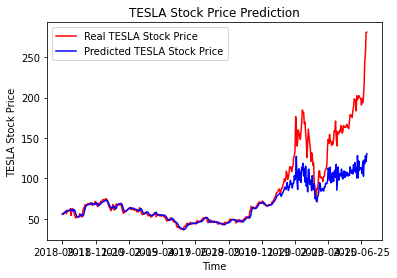

In [ ]:
# Visualising the results
plt.plot(df.loc[800:1258, 'Date'],dataset_test.values[:459], color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:1258, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

Lag 7

In [ ]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800,7):
    X_train.append(training_set_scaled[i-1:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)


(106, 1, 1)


In [ ]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
4/4 [==============================] - 0s 6ms/step - loss: 0.3331
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 0.3164
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 0.2982
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 0.2792
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.2572
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.2321
Epoch 7/100
4/4 [==============================] - 0s 7ms/step - loss: 0.2022
Epoch 8/100
4/4 [==============================] - 0s 6ms/step - loss: 0.1623
Epoch 9/100
4/4 [==============================] - 0s 6ms/step - loss: 0.1273
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0884
Epoch 11/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0565
Epoch 12/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0423
Epoch 13/100
4/4 [==============================] - 0s 6ms/st

In [ ]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total7) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(459, 60, 1)


In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

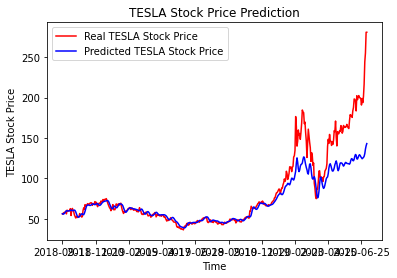

In [ ]:
# Visualising the results
plt.plot(df.loc[800:1258, 'Date'],dataset_test.values[:459], color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:1258, 'Date'],predicted_stock_price7, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

Lag 14


In [ ]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800,14):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)

(53, 60, 1)


In [ ]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train14.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
2/2 [==============================] - 0s 57ms/step - loss: 0.3125
Epoch 2/100
2/2 [==============================] - 0s 52ms/step - loss: 0.2057
Epoch 3/100
2/2 [==============================] - 0s 55ms/step - loss: 0.0803
Epoch 4/100
2/2 [==============================] - 0s 53ms/step - loss: 0.0371
Epoch 5/100
2/2 [==============================] - 0s 54ms/step - loss: 0.0934
Epoch 6/100
2/2 [==============================] - 0s 52ms/step - loss: 0.0329
Epoch 7/100
2/2 [==============================] - 0s 54ms/step - loss: 0.0305
Epoch 8/100
2/2 [==============================] - 0s 56ms/step - loss: 0.0484
Epoch 9/100
2/2 [==============================] - 0s 53ms/step - loss: 0.0423
Epoch 10/100
2/2 [==============================] - 0s 63ms/step - loss: 0.0300
Epoch 11/100
2/2 [==============================] - 0s 60ms/step - loss: 0.0172
Epoch 12/100
2/2 [==============================] - 0s 54ms/step - loss: 0.0211
Epoch 13/100
2/2 [==============================]

In [ ]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(459, 60, 1)


In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

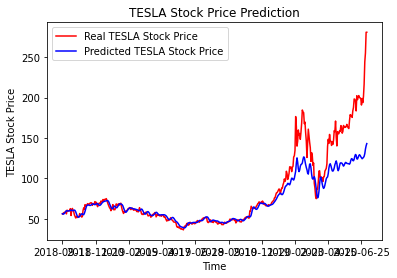

In [ ]:
# Visualising the results
plt.plot(df.loc[800:1258, 'Date'],dataset_test.values[:459], color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:1258, 'Date'],predicted_stock_price7, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

4 Layers with dropout and batch size


In [185]:
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

In [186]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)

(740, 60, 1)


In [187]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

In [188]:
model1 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model1.add(Dropout(0.5))
# Adding a second LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.5))
# Adding a third LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.5))
# Adding a fourth LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50))
model1.add(Dropout(0.5))
# Adding the output layer
model1.add(Dense(units = 1))

In [189]:
model2 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model2.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50))
model2.add(Dropout(0.2))
# Adding the output layer
model2.add(Dense(units = 1))

In [190]:
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model1.compile(optimizer = 'adam', loss = 'mean_squared_error')
model2.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [191]:
# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)
model1.fit(X_train, y_train, epochs = 100, batch_size = 32)
model2.fit(X_train, y_train, epochs = 100, batch_size = 64)

Epoch 1/100
24/24 [==============================] - 3s 106ms/step - loss: 0.0535
Epoch 2/100
24/24 [==============================] - 3s 116ms/step - loss: 0.0151
Epoch 3/100
24/24 [==============================] - 3s 115ms/step - loss: 0.0122
Epoch 4/100
24/24 [==============================] - 3s 115ms/step - loss: 0.0121
Epoch 5/100
24/24 [==============================] - 3s 116ms/step - loss: 0.0117
Epoch 6/100
24/24 [==============================] - 3s 116ms/step - loss: 0.0114
Epoch 7/100
24/24 [==============================] - 3s 116ms/step - loss: 0.0120
Epoch 8/100
24/24 [==============================] - 3s 119ms/step - loss: 0.0104
Epoch 9/100
24/24 [==============================] - 3s 116ms/step - loss: 0.0100
Epoch 10/100
24/24 [==============================] - 3s 115ms/step - loss: 0.0100
Epoch 11/100
24/24 [==============================] - 3s 116ms/step - loss: 0.0113
Epoch 12/100
24/24 [==============================] - 3s 115ms/step - loss: 0.0095
Epoch 13/100


In [196]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(459, 60, 1)


In [197]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [198]:
predicted_stock_price1 = model1.predict(X_test)
predicted_stock_price1 = sc.inverse_transform(predicted_stock_price1)

In [199]:
predicted_stock_price2 = model2.predict(X_test)
predicted_stock_price2 = sc.inverse_transform(predicted_stock_price2)

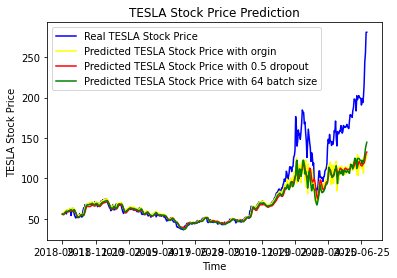

In [200]:
# Visualising the results
plt.plot(df.loc[800:1258, 'Date'],dataset_test.values[:459], color = 'blue', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:1258, 'Date'],predicted_stock_price, color = 'yellow', label = 'Predicted TESLA Stock Price with orgin')
plt.plot(df.loc[800:1258, 'Date'],predicted_stock_price1, color = 'red', label = 'Predicted TESLA Stock Price with 0.5 dropout')
plt.plot(df.loc[800:1258, 'Date'],predicted_stock_price2, color = 'green', label = 'Predicted TESLA Stock Price with 64 batch size')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

6 Hidden Layers

In [180]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [181]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fifth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a sixth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 4s 165ms/step - loss: 0.0728
Epoch 2/100
24/24 [==============================] - 4s 179ms/step - loss: 0.0193
Epoch 3/100
24/24 [==============================] - 4s 175ms/step - loss: 0.0160
Epoch 4/100
24/24 [==============================] - 4s 177ms/step - loss: 0.0166
Epoch 5/100
24/24 [==============================] - 4s 174ms/step - loss: 0.0166
Epoch 6/100
24/24 [==============================] - 4s 175ms/step - loss: 0.0148
Epoch 7/100
24/24 [==============================] - 4s 177ms/step - loss: 0.0145
Epoch 8/100
24/24 [==============================] - 4s 175ms/step - loss: 0.0143
Epoch 9/100
24/24 [==============================] - 4s 175ms/step - loss: 0.0146
Epoch 10/100
24/24 [==============================] - 4s 176ms/step - loss: 0.0122
Epoch 11/100
24/24 [==============================] - 4s 176ms/step - loss: 0.0118
Epoch 12/100
24/24 [==============================] - 4s 175ms/step - loss: 0.0139
Epoch 13/100


In [182]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)


(459, 60, 1)


In [183]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

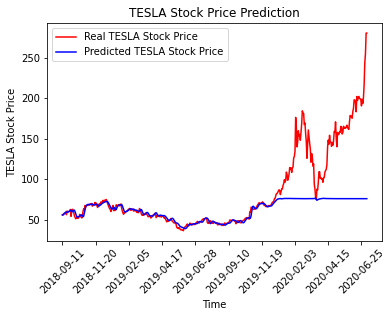

In [184]:
# Visualising the results
plt.plot(df.loc[800:1258, 'Date'],dataset_test.values[:459], color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:1258, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,459,50),rotation=45)
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

Prediction


In [ ]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [ ]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
24/24 [==============================] - 3s 105ms/step - loss: 0.0632
Epoch 2/100
24/24 [==============================] - 3s 114ms/step - loss: 0.0167
Epoch 3/100
24/24 [==============================] - 3s 115ms/step - loss: 0.0128
Epoch 4/100
24/24 [==============================] - 3s 115ms/step - loss: 0.0124
Epoch 5/100
24/24 [==============================] - 3s 116ms/step - loss: 0.0117
Epoch 6/100
24/24 [==============================] - 3s 116ms/step - loss: 0.0131
Epoch 7/100
24/24 [==============================] - 3s 116ms/step - loss: 0.0121
Epoch 8/100
24/24 [==============================] - 3s 116ms/step - loss: 0.0121
Epoch 9/100
24/24 [==============================] - 3s 115ms/step - loss: 0.0110
Epoch 10/100
24/24 [==============================] - 3s 116ms/step - loss: 0.0112
Epoch 11/100
24/24 [==============================] - 3s 115ms/step - loss: 0.0106
Epoch 12/100
24/24 [==============================] - 3s 114ms/step - loss: 0.0111
Epoch 13/100


In [ ]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(459, 60, 1)


In [ ]:
import copy
predicted_days=14
X_test2=copy.deepcopy(X_test)
for i in range(predicted_days):
    X_temp=np.zeros([1,60,1])
    for j in range(58):
        X_temp[0][j][0]=X_test2[-1][j+1][0]
    X_temp[0][59][0]=model.predict(X_test2[-1:])[0][0]
    X_test2=np.vstack([X_test2,X_temp])
predicted_stock_price = model.predict(X_test2)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

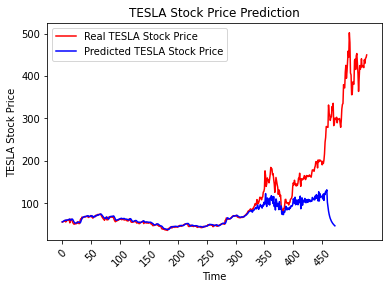

In [ ]:
# Visualising the results
plt.plot(dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')

plt.xticks(np.arange(0,459,50),rotation=45)
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()